# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [3]:
by_type = data.groupby('ItemType')['RetailSales', 'RetailTransfers', 'WarehouseSales'].sum()
by_type.head()

,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,
BEER,209763.11,234924.44,2437617.32
DUNNAGE,0.00,0.00,-45331.00
KEGS,0.00,0.00,43558.00
LIQUOR,309847.85,334176.41,33173.32
NON-ALCOHOL,8109.97,9058.37,8656.72


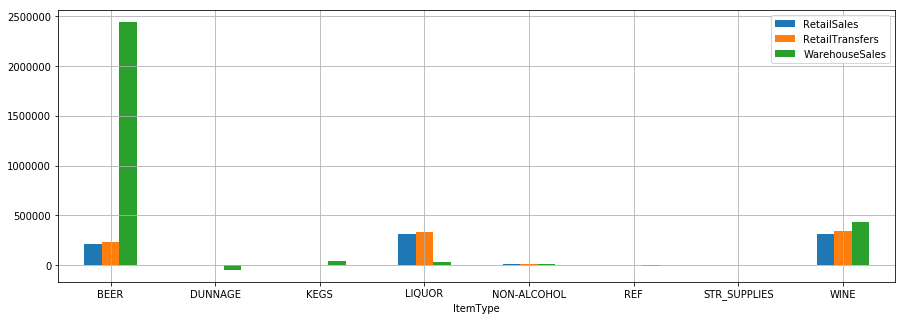

In [4]:
by_type.plot(
    kind = 'bar',
    figsize = (15, 5), # a touble (width, height) in inches
    rot = 0,
    grid = True
)

In [5]:
import chart_studio.plotly as py 
import cufflinks as cf
cf.go_offline()

by_type.iplot(kind = 'bar')

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [6]:
data['Total Sales'] = data['RetailSales'] + data['WarehouseSales']

total_sales = pd.DataFrame(data.groupby('Supplier')['Total Sales'].sum())

top_10_Sales = total_sales.sort_values('Total Sales', ascending = False).head(10)

top_10_Sales = top_10_Sales.sort_values('Total Sales')

top_10_Sales


,Total Sales
Supplier,
FLYING DOG BREWERY LLLP,57528.30
YUENGLING BREWERY,63433.67
BOSTON BEER CORPORATION,64194.16
CONSTELLATION BRANDS,99441.27
DIAGEO NORTH AMERICA INC,111909.24
E & J GALLO WINERY,143050.62
HEINEKEN USA,339735.76
ANHEUSER BUSCH INC,536415.33
CROWN IMPORTS,606532.53


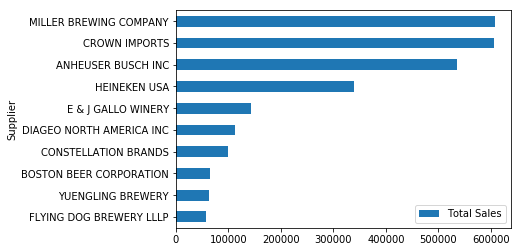

In [7]:
top_10_Sales.plot(kind = 'barh')

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [8]:
by_year_month = data.groupby(['Year', 'Month'])['RetailSales', 'RetailTransfers', 'WarehouseSales'].mean()
by_year_month

RetailSales  RetailTransfers  WarehouseSales
Year Month                                              
2017 4         0.000000        15.707503        0.000000
     5         7.038838         7.421817       27.310548
     6         7.143914         6.950396       27.839069
     8         6.409991         6.584726       28.122641
     9         6.757254         6.419721       22.817909
     10        6.549021         6.827827       22.289367
     11        6.765496         7.103699       23.348862
     12        9.078241         8.353759       21.169463
2018 1         5.679413         5.574833       19.072137
     2         5.939247         6.050136       20.229658

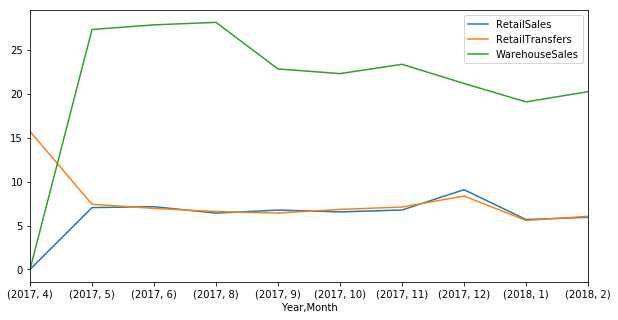

In [9]:
by_year_month.plot(kind = 'line', figsize = (10, 5))

## 4. Plot the same information as above but as a bar chart.

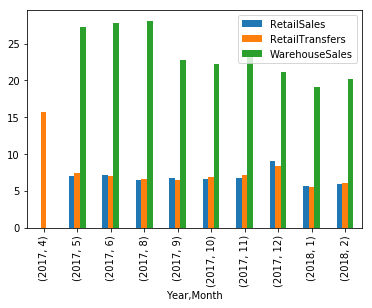

In [10]:
by_year_month.plot(kind = 'bar')

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

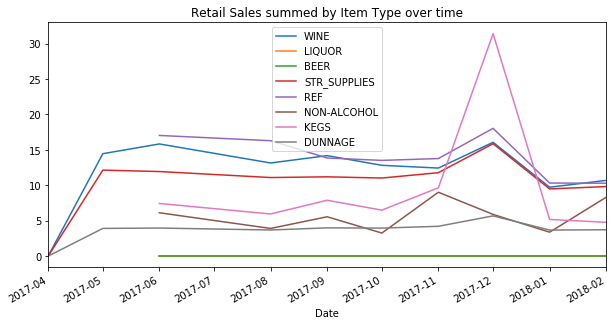

In [82]:
# sales_by_year_month = pd.DataFrame(data.groupby(['Year', 'Month','ItemType'])['RetailSales'].sum())
# sales_by_year_month
import datetime

df_day = data[['ItemType', 'RetailSales', 'Year', 'Month']]
df_day['Day'] = 1
sales = df_day[['ItemType', 'RetailSales']]
sales['Date'] = pd.to_datetime(df_day[['Year', 'Month','Day']])

# sales_by_D_IT = pd.DataFrame(sales.groupby(['Date','ItemType'])['RetailSales'].sum())
# sales_by_D_IT

ax_sales = pd.pivot_table(sales,
               values=['RetailSales'],
               index=['Date'],
               columns=['ItemType'],
               aggfunc='mean'
              )

ax = ax_sales.plot(kind = 'line', figsize = (10, 5))

# list(sales['ItemType'].dropna().unique())

list_I_T = list(sales['ItemType'].dropna().unique())

ax.legend(list_I_T)
ax.title.set_text('Retail Sales summed by Item Type over time')
# print(sales[sales.isna().any(axis=1)]) #shows you what line has null values



## 6. Plot the same information as above but as a bar chart.

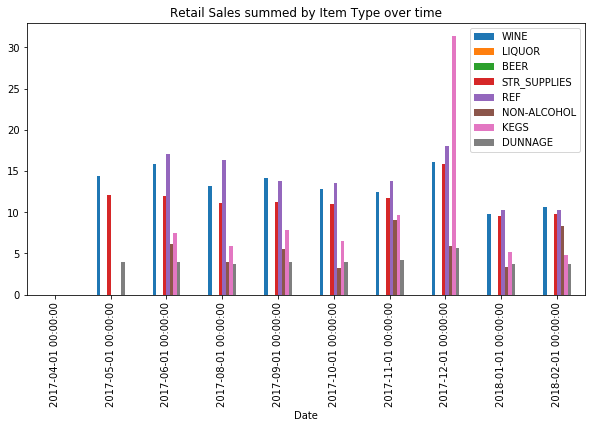

In [85]:
ax_bar = ax_sales.plot(kind = 'bar', figsize = (10, 5))
ax_bar.legend(list_I_T)
ax_bar.title.set_text('Retail Sales summed by Item Type over time')

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

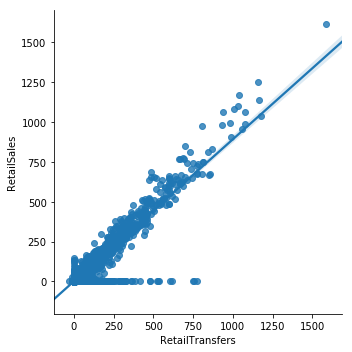

In [87]:
g = sns.lmplot(x="RetailTransfers", y="RetailSales", data=data)
g

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

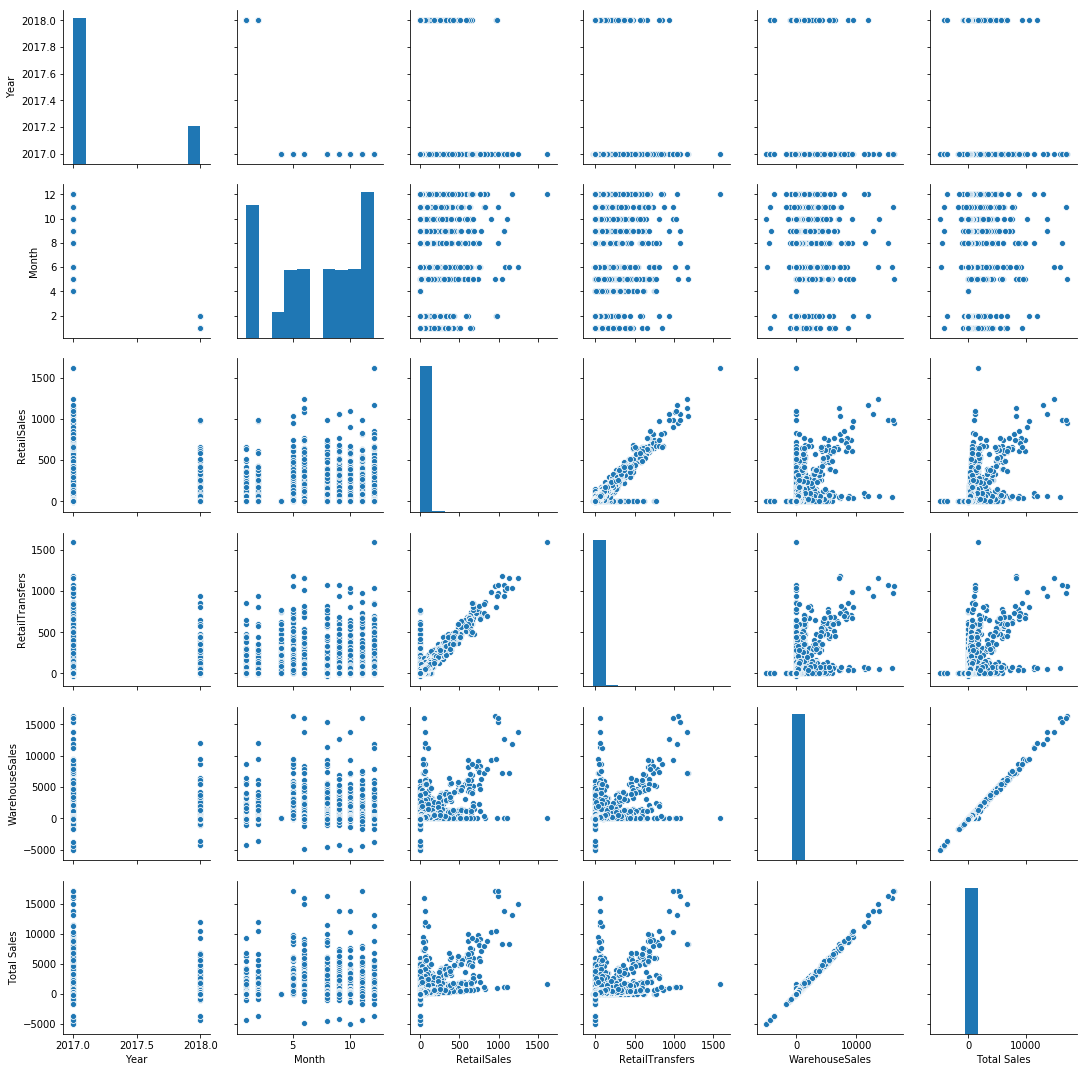

In [90]:
sns.pairplot(data = data)